<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/SLCKNEWNEW_MIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras


df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df2 = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')

print(df.shape[0])
print(df2.shape[0])

print(df2.head())

df[' LPTUB'] = df2[' LPTUB']
df[' SLACKUB'] = df2[' SLACKUB']



df = df[df['n/m']==2]

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = [ 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']

8750
8750
       inst.name         type  subtype  class  indeks   n   m  n/m  (n/m)^2  \
0  C_1_1_20_10_1  C-instances        1      1       1  20  10  2.0      4.0   
1  C_1_1_20_10_2  C-instances        1      1       2  20  10  2.0      4.0   
2  C_1_1_20_10_3  C-instances        1      1       3  20  10  2.0      4.0   
3  C_1_1_20_10_4  C-instances        1      1       4  20  10  2.0      4.0   
4  C_1_1_20_10_5  C-instances        1      1       5  20  10  2.0      4.0   

   (n/m)^3  ...    std.dev  median  range  min  max   k   LPTUB   SLACKUB  \
0      8.0  ...  26.660194    60.5     95    1   96  19     107       107   
1      8.0  ...  33.809685    61.0     97    3  100  20     111       111   
2      8.0  ...  21.702778    46.5     75    4   79  18      92        92   
3      8.0  ...  29.953428    48.0     92    2   94  16      95        95   
4      8.0  ...  21.353172    40.5     76    9   85  18      98        98   

          y  train  
0  0.000041      1  
1  0.89019

In [2]:
y_new = []
cnt0=0
cnt1=0
cnt2=0
cnt3=0
for val in y:
  if(val<10):
    y_new.append(0)
    cnt0+=1
  elif(10 <= val and val<1000):
    y_new.append(1)
    cnt1+=1
  else:
    y_new.append(2)
    cnt2+=1

cnt = 0
if(cnt0>0):
  cnt+=1
if(cnt1>0):
  cnt+=1
if(cnt2>0):
  cnt+=1
if(cnt3>0):
  cnt+=1

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)

In [3]:
names = [ 'av.length', 'n', 'std.dev', 'k', 'm', 'max']
X_modified = X.drop([   'n/m', 'indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','median', 'min', 'range'], axis = 1)
print(X_modified.head())
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)


     n    m   av.length     std.dev   max    k          y   LPTUB   SLACKUB
0   40   20   60.299999   24.766809   100   33   1.486177     128       128
1   80   40   60.662498   22.404194    98   48   7.128994     125       125
2  200  100   53.240002   28.687759   100   85  36.112316     111       111
3   40   20   75.625000   15.165223   100   31   0.486186     155       155
4  180   90  735.549988  197.537415  1205  167   7.119674    1506      1506


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = X_train.drop(['y', 'k', 'm'], axis = 1)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
print(X_test_copy.head())
X_test = X_test.drop(['y', 'k', 'm'], axis = 1)
X_test = sc.transform(X_test)

1374
153
        n   m   av.length     std.dev  max    k             y   LPTUB  \
1362  160  80  103.606247   48.652172  263  115  99999.000000     263   
511    80  40   99.724998   17.894892  144   46      2.262995     204   
9      20  10   77.949997   13.862007   99   20      0.069473     158   
393   120  60   53.291668   29.580088  100   67     18.385288     112   
471   140  70  541.721436  136.000320  869  127      2.955811    1107   

       SLACKUB  
1362       263  
511        204  
9          158  
393        112  
471       1107  


In [6]:

from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = X_modified.shape[1]-3, activation='relu'))

classifier.add(Dense(12, activation = 'relu'))
classifier.add(Dropout(0.125))

#classifier.add(Dense(32, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

#classifier.add(Dense(16, activation='relu'))

#classifier.add(Dense(8, activation='relu'))

#classifier.add(Dense(12, activation='relu'))

classifier.add(Dense(cnt, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 64, 
                    epochs = 350, shuffle = True)

Epoch 1/350
22/22 [==============================] - 2s 7ms/step - loss: 1.1607 - accuracy: 0.3377
Epoch 2/350
22/22 [==============================] - 0s 4ms/step - loss: 1.1183 - accuracy: 0.3261
Epoch 3/350
22/22 [==============================] - 0s 3ms/step - loss: 1.0893 - accuracy: 0.3763
Epoch 4/350
22/22 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4949
Epoch 5/350
22/22 [==============================] - 0s 4ms/step - loss: 1.0506 - accuracy: 0.5233
Epoch 6/350
22/22 [==============================] - 0s 4ms/step - loss: 1.0354 - accuracy: 0.5328
Epoch 7/350
22/22 [==============================] - 0s 4ms/step - loss: 1.0092 - accuracy: 0.5626
Epoch 8/350
22/22 [==============================] - 0s 4ms/step - loss: 0.9805 - accuracy: 0.5961
Epoch 9/350
22/22 [==============================] - 0s 6ms/step - loss: 0.9511 - accuracy: 0.6186
Epoch 10/350
22/22 [==============================] - 0s 7ms/step - loss: 0.9223 - accuracy: 0.6237
Epoch 11/

accuracy: 90.20%


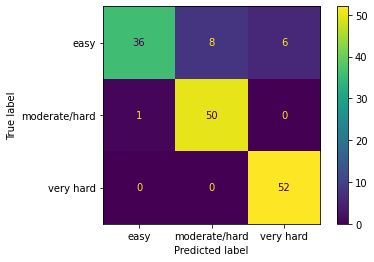

In [8]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate/hard', 'very hard'])
cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

In [9]:
column_names = ['n', 'k', 'n/m', 'av.length', 'std.dev', 'y']
df_reg = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 1):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'n/m': 2, 
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'std.dev' : X_test_copy.iloc[i]['std.dev'],
                  'k' : X_test_copy.iloc[i]['k'],
                  'y': X_test_copy.iloc[i]['y']}
    df_reg = df_reg.append(dictionary, ignore_index = True)
#VM

153
153


In [10]:
column_names = ['n', 'k', 'm', 'std.dev', 'y']
df_reg0 = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 0):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'max': X_test_copy.iloc[i]['max'],
                  'm' : X_test_copy.iloc[i]['m'], 'std.dev' : X_test_copy.iloc[i]['std.dev'], 
                  'k' : X_test_copy.iloc[i]['k'], 'y': X_test_copy.iloc[i]['y']}
    df_reg0 = df_reg0.append(dictionary, ignore_index = True)
#EASY

153
153


In [11]:
column_names = ['n', 'k', 'av.length', 'std.dev', 'm', 'y']
df_reg2 = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 2):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'm': X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'std.dev' : X_test_copy.iloc[i]['std.dev'],
                  'k' : X_test_copy.iloc[i]['k'], 'y': X_test_copy.iloc[i]['y']}
    df_reg2 = df_reg2.append(dictionary, ignore_index = True)

#VHARD

153
153


In [12]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras


df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df2 = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')

print(df.shape[0])
print(df2.shape[0])

print(df2.head())

#df[' LPTUB'] = df2[' LPTUB']
#df[' SLACKUB'] = df2[' SLACKUB']



df = df[df['n/m']!=2]

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = [ 'index', 'inst.name','type', 'CPLEXStatus'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']

8750
8750
       inst.name         type  subtype  class  indeks   n   m  n/m  (n/m)^2  \
0  C_1_1_20_10_1  C-instances        1      1       1  20  10  2.0      4.0   
1  C_1_1_20_10_2  C-instances        1      1       2  20  10  2.0      4.0   
2  C_1_1_20_10_3  C-instances        1      1       3  20  10  2.0      4.0   
3  C_1_1_20_10_4  C-instances        1      1       4  20  10  2.0      4.0   
4  C_1_1_20_10_5  C-instances        1      1       5  20  10  2.0      4.0   

   (n/m)^3  ...    std.dev  median  range  min  max   k   LPTUB   SLACKUB  \
0      8.0  ...  26.660194    60.5     95    1   96  19     107       107   
1      8.0  ...  33.809685    61.0     97    3  100  20     111       111   
2      8.0  ...  21.702778    46.5     75    4   79  18      92        92   
3      8.0  ...  29.953428    48.0     92    2   94  16      95        95   
4      8.0  ...  21.353172    40.5     76    9   85  18      98        98   

          y  train  
0  0.000041      1  
1  0.89019

In [13]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <1000):
    y_new.append(1)
  else:
    y_new.append(2)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [14]:
from imblearn.over_sampling import RandomOverSampler

names =[ 'std.dev', 'n','n/m', 'max','av.length', 'm', 'k']
X_modified = X.drop([  'median', 'range',  'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
#print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

In [15]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [16]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = X_train.drop(['y',  'm'], axis = 1)
X_train = sc.fit_transform(X_train)
X_test_copy = X_test
print(X_test_copy.head())
X_test = X_test.drop(['y',  'm'], axis = 1)
X_test = sc.transform(X_test)

12363
1374
         n   m   n/m   av.length    std.dev  max   k           y
3234    80  32  2.50   51.512501  28.682453   98  52    7.210658
4495    54   9  6.00   99.407410  19.328850  144  34  139.884262
10982   18   6  3.00   92.777779  52.844452  198  18    1.214425
9657    72  32  2.25  291.180542  71.720177  476  65    6.356726
5976   144  32  4.50   62.513889  22.242149  100  66   77.062569


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(16, input_dim = X_modified.shape[1]-2, activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(3, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                112       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 32, 
                    epochs = 120)

Epoch 1/120
387/387 [==============================] - 1s 2ms/step - loss: 0.6719 - accuracy: 0.7161
Epoch 2/120
387/387 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8335
Epoch 3/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8477
Epoch 4/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8532
Epoch 5/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8583
Epoch 6/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8654
Epoch 7/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8716
Epoch 8/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8738
Epoch 9/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8759
Epoch 10/120
387/387 [==============================] - 1s 2ms/step - loss: 0.3174 - accura

accuracy: 90.90%


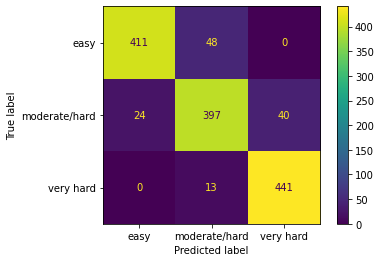

In [19]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate/hard', 'very hard'])

cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

In [20]:
for i in range(len(pred)):
  if(pred_[i] == 1):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'n/m': X_test_copy.iloc[i]['n/m'], 
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'std.dev' : X_test_copy.iloc[i]['std.dev'],
                  'k' : X_test_copy.iloc[i]['k'], 'y': X_test_copy.iloc[i]['y']}
    df_reg = df_reg.append(dictionary, ignore_index = True)

for i in range(len(pred)):
  if(pred_[i] == 0):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'max': X_test_copy.iloc[i]['max'],
                  'm' : X_test_copy.iloc[i]['m'], 'std.dev' : X_test_copy.iloc[i]['std.dev'], 
                  'k' : X_test_copy.iloc[i]['k'], 'y': X_test_copy.iloc[i]['y']}
    df_reg0 = df_reg0.append(dictionary, ignore_index = True)
#EASY

for i in range(len(pred)):
  if(pred_[i] == 2):
    dictionary = {'n' : X_test_copy.iloc[i]['n'], 'm': X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'std.dev' : X_test_copy.iloc[i]['std.dev'], 
                  'k' : X_test_copy.iloc[i]['k'], 'y': X_test_copy.iloc[i]['y']}
    df_reg2 = df_reg2.append(dictionary, ignore_index = True)

#VHARD

In [21]:
print(df_reg.shape[0])
print(df_reg.head(500))

516
         n     k  n/m   av.length    std.dev           y
0    120.0  67.0  2.0   53.291668  29.580088   18.385288
1    180.0  82.0  2.0   51.916668  28.931219   20.934832
2     80.0  53.0  2.0   56.462502  30.752979    7.197010
3    140.0  60.0  2.0   99.935715  19.174026   14.583659
4    160.0  83.0  2.0   52.431252  27.448208   23.294056
..     ...   ...  ...         ...        ...         ...
495  120.0  57.0  5.0   55.000000  23.464617    9.232977
496   36.0  29.0  9.0   99.138885  20.577595   71.848488
497  162.0  72.0  9.0   49.802467  29.969305  612.404663
498   54.0  38.0  6.0   79.425926  14.134933   58.852150
499   72.0  59.0  4.5  110.819443  49.705708  122.445297

[500 rows x 6 columns]


In [22]:
print(df_reg0.head())

       n     k     m     std.dev         y    max
0   80.0  46.0  40.0   17.894892  2.262995  144.0
1   20.0  20.0  10.0   13.862007  0.069473   99.0
2  100.0  91.0  50.0  109.625710  1.342537  653.0
3   60.0  44.0  30.0   27.380737  4.086627  100.0
4   20.0  17.0  10.0   15.300155  0.120292   77.0


In [23]:
print(df_reg2.head())

       n      k   av.length     std.dev     m             y
0  160.0  115.0  103.606247   48.652172  80.0  99999.000000
1  140.0  127.0  541.721436  136.000320  70.0      2.955811
2  120.0  101.0  467.700012  115.940849  60.0  99999.000000
3  120.0   93.0   99.625000   48.803493  60.0  99999.000000
4  120.0  100.0  319.049988  109.162712  60.0  99999.000000


In [24]:
for i in range(df_reg2.shape[0]):
  if(df_reg2.iloc[i]['y'] == 99999):
    df_reg2.loc[i, 'y'] = 4510

for i in range(df_reg.shape[0]):
  if(df_reg.iloc[i]['y'] == 99999):
    df_reg.loc[i, 'y'] = 4510

for i in range(df_reg0.shape[0]):
  if(df_reg0.iloc[i]['y'] == 99999):
    df_reg0.loc[i, 'y'] = 4510

print(df_reg['y'].max())
print(df_reg0['y'].max())
print(df_reg2['y'].max())
shuffled = df_reg.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
X_modified = X

yy_final = []
predd_final = []

2458.807373
28.836004
4510.0


In [25]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

from imblearn.over_sampling import SMOTE

smote_on_3 = 50
#oversample = SMOTE(sampling_strategy={99999:50000})
#X_modified, y = oversample.fit_resample(X_modified, y)
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
tmp = tmp.sample(frac = 1).reset_index()
print(tmp.head(60))
#y = np.log10(tmp['y']*10)+20
y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)

2884
2884
    index      n      k    n/m   av.length     std.dev     y
0     728  180.0   73.0   4.00   61.738888   24.041712    29
1    1219  100.0   83.0   4.00   96.209999   47.907383    79
2     760  198.0   50.0   2.25   76.373741   14.993797    34
3    2489  126.0   89.0   6.00  102.293648   49.460457   472
4    2476  160.0   65.0   5.00   99.650002   19.604328   436
5    2254  160.0   64.0   5.00   98.631248   19.375669   277
6     680   90.0   78.0   3.00  224.766663   70.754532    25
7     724  200.0   77.0   2.00   58.310001   22.725452    29
8     781  162.0  105.0   3.00   94.475311   45.498505    36
9    1373   54.0   46.0   4.50   93.296295   47.311745    94
10    675  126.0   61.0   2.25   99.460320   18.285143    24
11    581  120.0   63.0   2.00   57.441666   23.780083     9
12   1692   72.0   48.0   6.00   58.125000   27.767109   133
13    299   90.0   43.0   4.50   73.877777   14.321218    21
14   2339  180.0   74.0   4.50   98.994446   20.884495   329
15    550  180

In [26]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 4510*1/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [27]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.9)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)
print(type(y_train))
for i in range(y_train.shape[0]):
  if(y_train.iloc[i] > 1000):
    y_train.iloc[i] = 1001
print(y_train.max())
X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=64, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

<class 'pandas.core.series.Series'>
1001
Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


41/41 [==============================] - 1s 2ms/step - loss: 3571051.0000
Epoch 2/300
41/41 [==============================] - 0s 2ms/step - loss: 1375728.5000
Epoch 3/300
41/41 [==============================] - 0s 2ms/step - loss: 436821.8750
Epoch 4/300
41/41 [==============================] - 0s 2ms/step - loss: 180079.8281
Epoch 5/300
41/41 [==============================] - 0s 2ms/step - loss: 115086.4922
Epoch 6/300
41/41 [==============================] - 0s 2ms/step - loss: 94755.3594
Epoch 7/300
41/41 [==============================] - 0s 2ms/step - loss: 84404.8125
Epoch 8/300
41/41 [==============================] - 0s 2ms/step - loss: 78625.0078
Epoch 9/300
41/41 [==============================] - 0s 2ms/step - loss: 73177.6953
Epoch 10/300
41/41 [==============================] - 0s 2ms/step - loss: 73488.0234
Epoch 11/300
41/41 [==============================] - 0s 2ms/step - loss: 68397.0312
Epoch 12/300
41/41 [==============================] - 0s 3ms/step - loss: 65693

In [28]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.power(predd, 10)/10

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

5/5 [==============================] - 0s 2ms/step
r_square score:  0.903544602234843
RMSE:


100.48143390676303

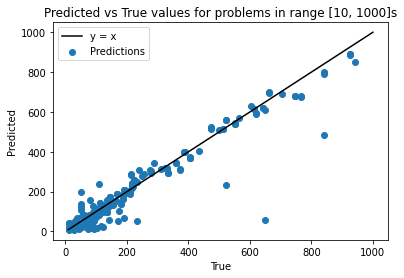

In [29]:
yy_temp = []
predd_temp = []

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])
  if(yy[i]>=10 and yy[i]<1000):
    yy_temp.append(yy[i])
    predd_temp.append(predd[i])

x = np.linspace(10, 1000, 2000)
y = x
plt.title('Predicted vs True values for problems in range [10, 1000]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x, y, color = 'black')
plt.scatter(yy_temp, predd_temp)
plt.legend(['y = x', 'Predictions'])

In [30]:
shuffled = df_reg0.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
X_modified = X

In [31]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

from imblearn.over_sampling import SMOTE

smote_on_3 = 50
#oversample = SMOTE(sampling_strategy={99999:50000})
#X_modified, y = oversample.fit_resample(X_modified, y)
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
print(tmp.head(60))
tmp = tmp.sample(frac = 1).reset_index()
#y = np.log10(tmp['y']*10)+20
tmp = tmp.dropna()
y = tmp['y']
y = np.log(y + 100)
X_modified = tmp.drop(['y'], axis = 1)

3864
3864
        n      k      m    std.dev    max  y
0    36.0   25.0    6.0  15.446042  100.0  8
1    54.0   40.0   24.0  19.775089  146.0  4
2    22.0   22.0    2.0  24.102236  150.0  3
3    54.0   38.0   18.0  17.812872  136.0  7
4    36.0   28.0    6.0  14.388487  100.0  1
5    60.0   46.0   30.0  23.594288   94.0  6
6    20.0   17.0    4.0  21.050314  100.0  0
7    60.0   49.0   24.0  55.840767  237.0  9
8    22.0   19.0    2.0  16.963675  121.0  3
9    20.0   18.0    4.0  21.550430   80.0  0
10   20.0   17.0    2.0  21.974329   95.0  1
11   18.0   16.0    2.0  16.533587  134.0  1
12   36.0   28.0    8.0  15.259319   99.0  8
13   44.0   30.0   16.0  21.785713   98.0  3
14   40.0   33.0   10.0  21.905842  100.0  8
15   20.0   18.0    2.0  42.685478  184.0  4
16   36.0   30.0   12.0  29.969969  138.0  4
17   18.0   15.0    3.0  15.363249  138.0  0
18   18.0   17.0    8.0  42.247364  187.0  0
19   18.0   16.0    3.0  13.545011   93.0  1
20   72.0   59.0   32.0  40.575352  204.0  8


In [32]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10*1/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(12, activation = 'relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1, activation = 'relu'))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    return model

In [33]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.9)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)


# i in range(X_train.shape[0]):
 # if(y_train.iloc[i] > 10):
  #  y_train.iloc[i] = 11

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=64, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


55/55 [==============================] - 1s 2ms/step - loss: 22.1095
Epoch 2/300
55/55 [==============================] - 0s 2ms/step - loss: 19.6010
Epoch 3/300
55/55 [==============================] - 0s 2ms/step - loss: 13.8643
Epoch 4/300
55/55 [==============================] - 0s 2ms/step - loss: 7.7380
Epoch 5/300
55/55 [==============================] - 0s 2ms/step - loss: 3.1880
Epoch 6/300
55/55 [==============================] - 0s 2ms/step - loss: 1.8565
Epoch 7/300
55/55 [==============================] - 0s 2ms/step - loss: 1.5218
Epoch 8/300
55/55 [==============================] - 0s 2ms/step - loss: 1.2848
Epoch 9/300
55/55 [==============================] - 0s 2ms/step - loss: 1.2002
Epoch 10/300
55/55 [==============================] - 0s 2ms/step - loss: 1.0594
Epoch 11/300
55/55 [==============================] - 0s 2ms/step - loss: 0.9593
Epoch 12/300
55/55 [==============================] - 0s 2ms/step - loss: 0.8590
Epoch 13/300
55/55 [==========================

7/7 [==============================] - 0s 2ms/step
r_square score:  0.9538673466529952
RMSE:
1.6544002626589631


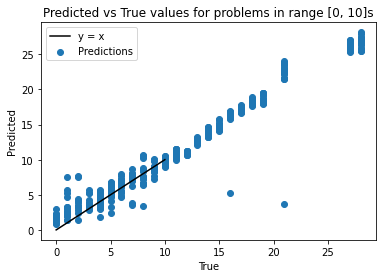

In [34]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.power(predd, 10)/10
#print(yy)
yy = np.exp(yy) - 100
predd = np.exp(predd) - 100
print("r_square score: ", r2_score(yy, predd))


from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
print(sqrt(mean_squared_error(yy, predd)))

x = np.linspace(0, 10, 100)
y = x
plt.title('Predicted vs True values for problems in range [0, 10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

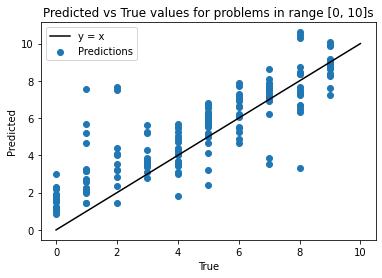

In [35]:
yy_temp = []
predd_temp = []

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])
  if(yy[i]<10):
    yy_temp.append(yy[i])
    predd_temp.append(predd[i])

x = np.linspace(0, 10, 100)
y = x
plt.title('Predicted vs True values for problems in range [0, 10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy_temp, predd_temp)
plt.legend(['y = x', 'Predictions'])

In [36]:
shuffled = df_reg2.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
X_modified = X

In [37]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

from imblearn.over_sampling import SMOTE

smote_on_3 = 50
#oversample = SMOTE(sampling_strategy={99999:50000})
#X_modified, y = oversample.fit_resample(X_modified, y)
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
print(tmp.head(60))
tmp = tmp.sample(frac = 1).reset_index()
#y = np.log10(tmp['y']*10)+20
tmp = tmp.dropna()
y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)

54144
54144
        n      k   av.length     std.dev     m     y
0   198.0  164.0  508.398987  175.845490  33.0  4510
1   100.0   84.0  250.309998   83.787453  10.0  4510
2   144.0  132.0  591.027771  151.620056  48.0   449
3   180.0  156.0  436.977783  148.199081  30.0  4510
4   180.0  158.0  446.294434  155.220795  20.0  4510
5   140.0  121.0  547.578552  137.977631  70.0  4510
6   160.0  141.0  661.843750  164.587997  32.0  4510
7   176.0  150.0  693.551147  172.725586  64.0  4510
8   198.0  118.0  105.393936   47.549454  33.0  4510
9   160.0   73.0  100.074997   22.030722  16.0  4510
10  200.0  121.0  103.739998   48.005047  20.0  4510
11  108.0   94.0  435.842590  109.971367  18.0  4510
12   72.0   64.0  273.277771   65.801498  16.0   230
13  176.0  152.0  438.829559  148.332993  16.0  4510
14   80.0   66.0  208.837494   71.844681   8.0  2035
15   90.0   78.0  378.444458   83.558784  10.0  4510
16   80.0   68.0  322.787506   81.723465   8.0  4510
17  120.0  101.0  467.700012  115.

In [38]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 4510*1/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.1))

    model.add(Dense(16, activation = 'relu'))

    model.add(Dense(4, activation = 'relu'))

    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    return model

In [39]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.9)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)


X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=60, batch_size=128, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


381/381 [==============================] - 1s 2ms/step - loss: 420825.6562
Epoch 2/60
381/381 [==============================] - 1s 2ms/step - loss: 143205.0312
Epoch 3/60
381/381 [==============================] - 1s 2ms/step - loss: 89083.0859
Epoch 4/60
381/381 [==============================] - 1s 2ms/step - loss: 62435.0703
Epoch 5/60
381/381 [==============================] - 1s 2ms/step - loss: 49777.0078
Epoch 6/60
381/381 [==============================] - 1s 2ms/step - loss: 41006.4531
Epoch 7/60
381/381 [==============================] - 1s 2ms/step - loss: 33681.5234
Epoch 8/60
381/381 [==============================] - 1s 2ms/step - loss: 29285.0859
Epoch 9/60
381/381 [==============================] - 1s 2ms/step - loss: 25282.7598
Epoch 10/60
381/381 [==============================] - 1s 2ms/step - loss: 24275.3477
Epoch 11/60
381/381 [==============================] - 1s 2ms/step - loss: 23034.3242
Epoch 12/60
381/381 [==============================] - 1s 2ms/step - los

In [40]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.power(predd, 10)/10

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

43/43 [==============================] - 0s 1ms/step
r_square score:  0.9859891328723495
RMSE:


123.15985447829415

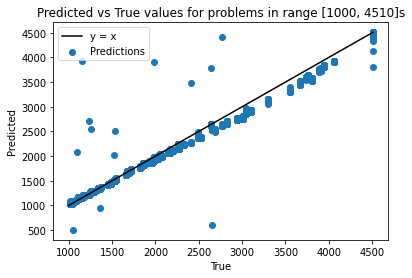

In [41]:
yy_temp = []
predd_temp = []

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])
  if(yy[i]>1000):
    yy_temp.append(yy[i])
    predd_temp.append(predd[i])

x = np.linspace(1000, 4510, 2000)
y = x

plt.title('Predicted vs True values for problems in range [1000, 4510]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy_temp, predd_temp)
plt.legend(['y = x', 'Predictions'])

In [42]:
print("r_square score: ", r2_score(yy_final, predd_final))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(yy_final)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(predd_final)
#predd = np.power(predd, 10)/10

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

r_square score:  0.9879151045971889
RMSE:


118.16995559188253

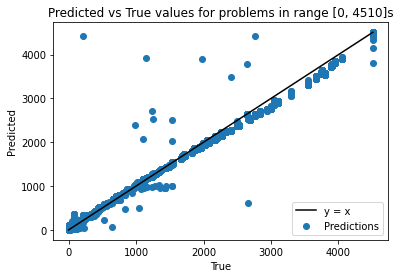

In [43]:
x = np.linspace(0, 4510, 2000)
y = x

plt.title('Predicted vs True values for problems in range [0, 4510]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy_final, predd_final)
plt.legend(['y = x', 'Predictions'])